In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from math import isnan

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [10]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [13]:
Powdery_Mildew = "/kaggle/input/mango-leaf-disease-dataset/Powdery Mildew/"
Anthracnose = "/kaggle/input/mango-leaf-disease-dataset/Anthracnose/"
Healthy = "/kaggle/input/mango-leaf-disease-dataset/Healthy/"
Cutting_Weevil = "/kaggle/input/mango-leaf-disease-dataset/Cutting Weevil/"
Die_Back = "/kaggle/input/mango-leaf-disease-dataset/Die Back/"
Sooty_Mould = "/kaggle/input/mango-leaf-disease-dataset/Sooty Mould/"
Bacterial = "/kaggle/input/mango-leaf-disease-dataset/Bacterial Canker/"
Gall = "/kaggle/input/mango-leaf-disease-dataset/Gall Midge/"

In [8]:
pic_height = 240
pic_len = 320

# Image Classification

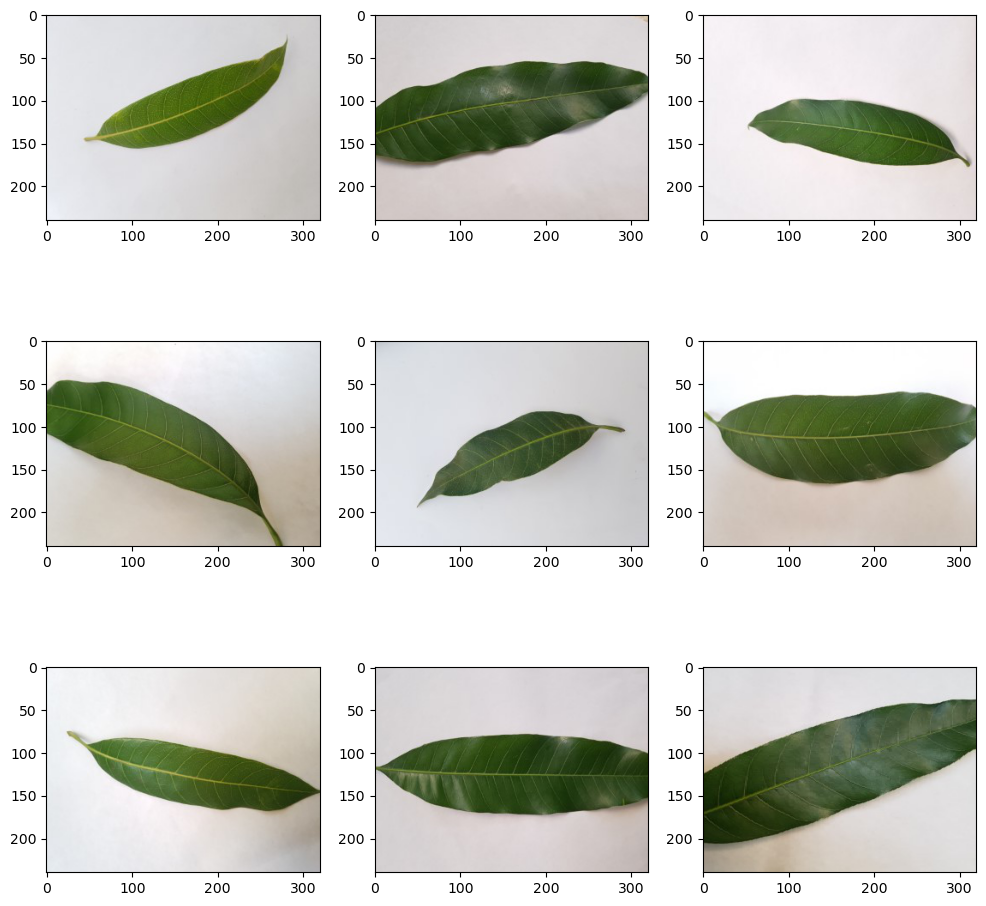

In [11]:
type = 'healthy'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(Healthy+"/"+
                  os.listdir(Healthy)[i], target_size=(pic_height, pic_len))
    plt.imshow(img)   
plt.show()

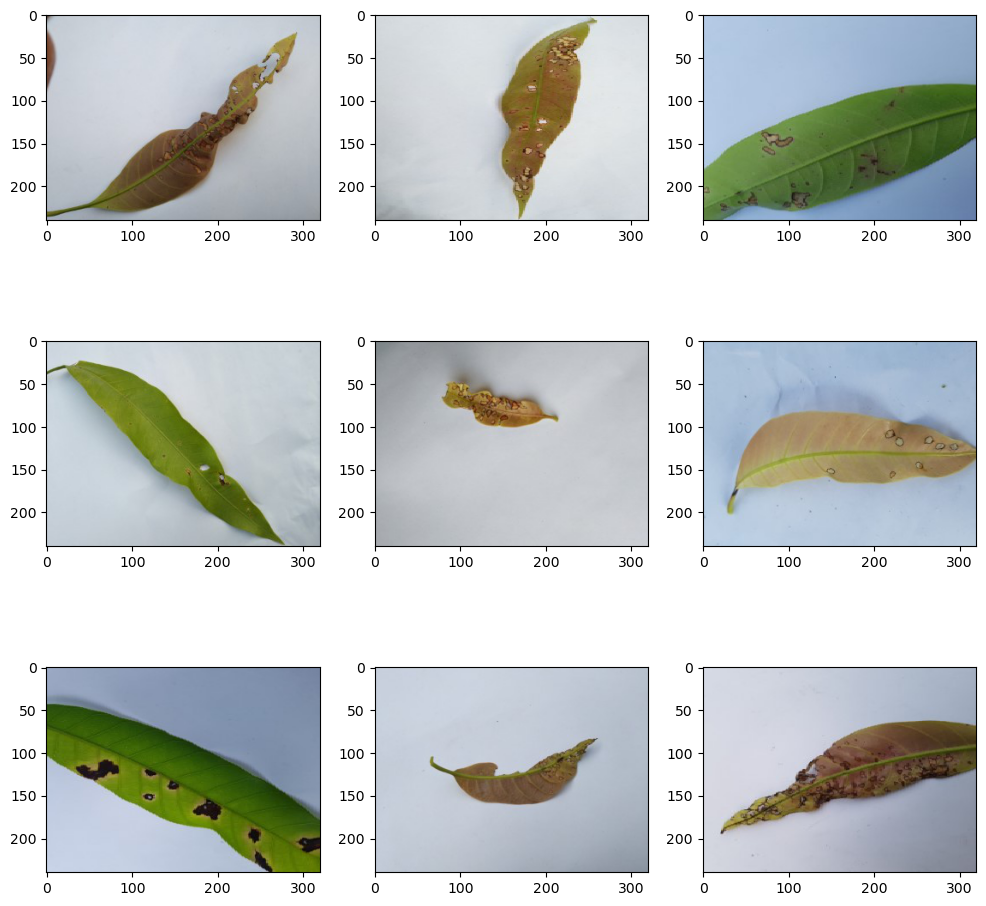

In [14]:
type = 'Anthracnose'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(Anthracnose+"/"+
                  os.listdir(Anthracnose)[i], target_size=(pic_height, pic_len))
    plt.imshow(img)   
plt.show()

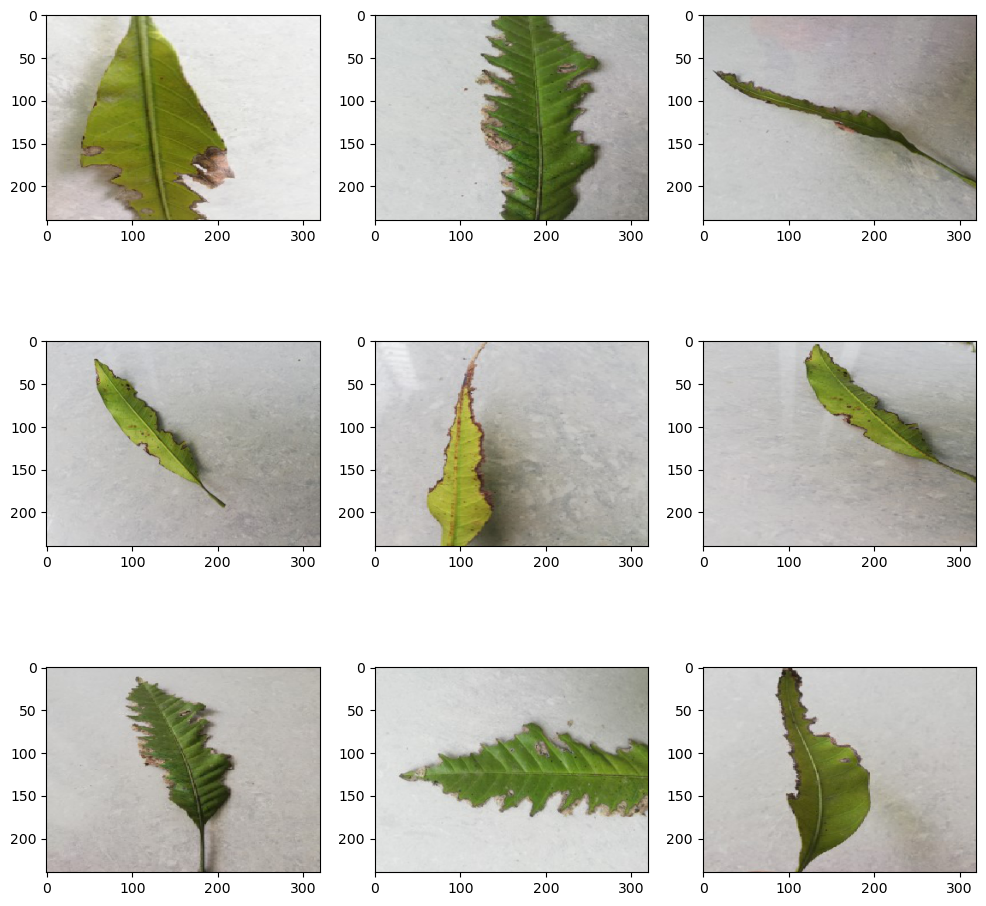

In [16]:
type = 'Bacterial Canker'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(Bacterial+"/"+
                  os.listdir(Bacterial)[i], target_size=(pic_height, pic_len))
    plt.imshow(img)   
plt.show()

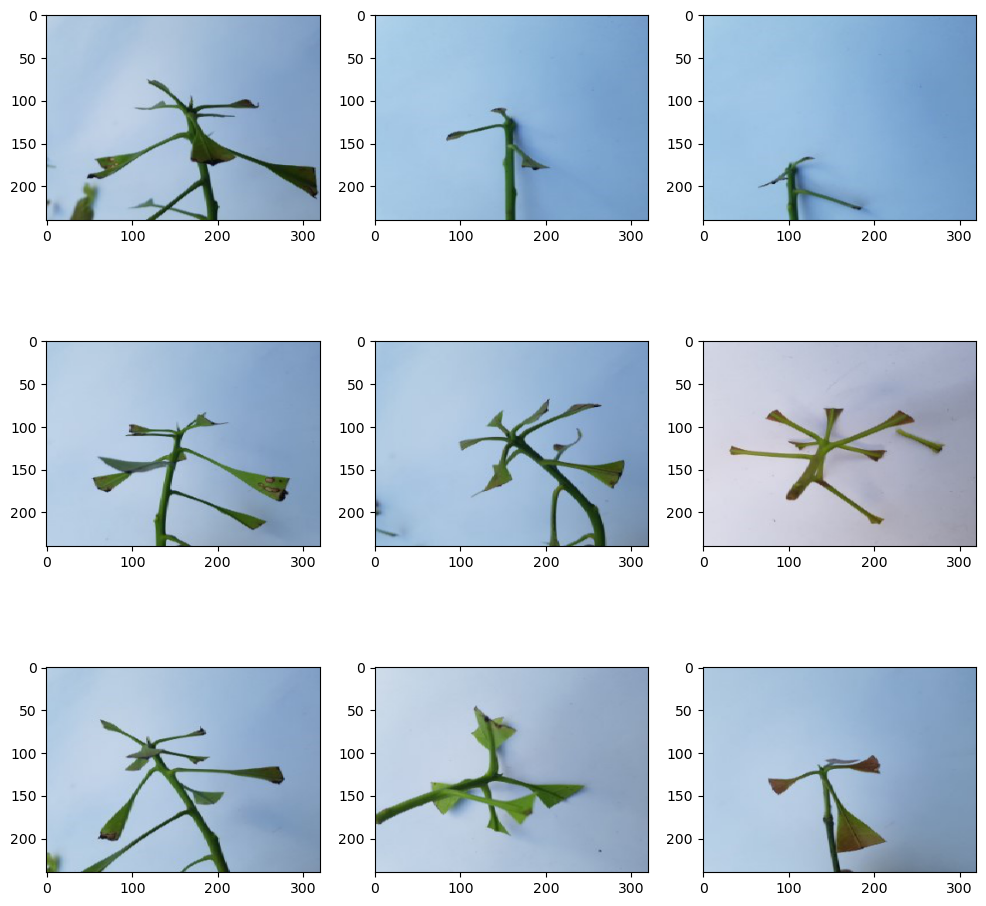

In [17]:
type = 'Cutting Weevil'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(Cutting_Weevil+"/"+
                  os.listdir(Cutting_Weevil)[i], target_size=(pic_height, pic_len))
    plt.imshow(img)   
plt.show()

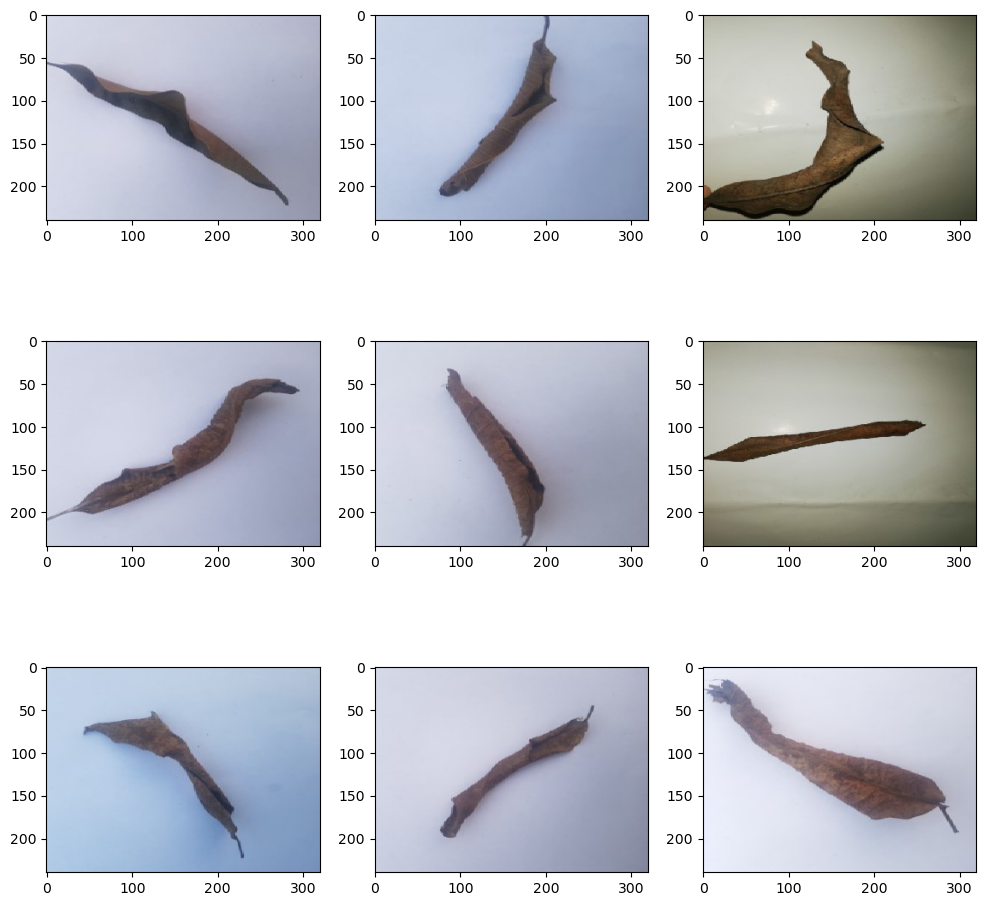

In [18]:
type = 'Die_Back'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(Die_Back+"/"+
                  os.listdir(Die_Back)[i], target_size=(pic_height, pic_len))
    plt.imshow(img)   
plt.show()

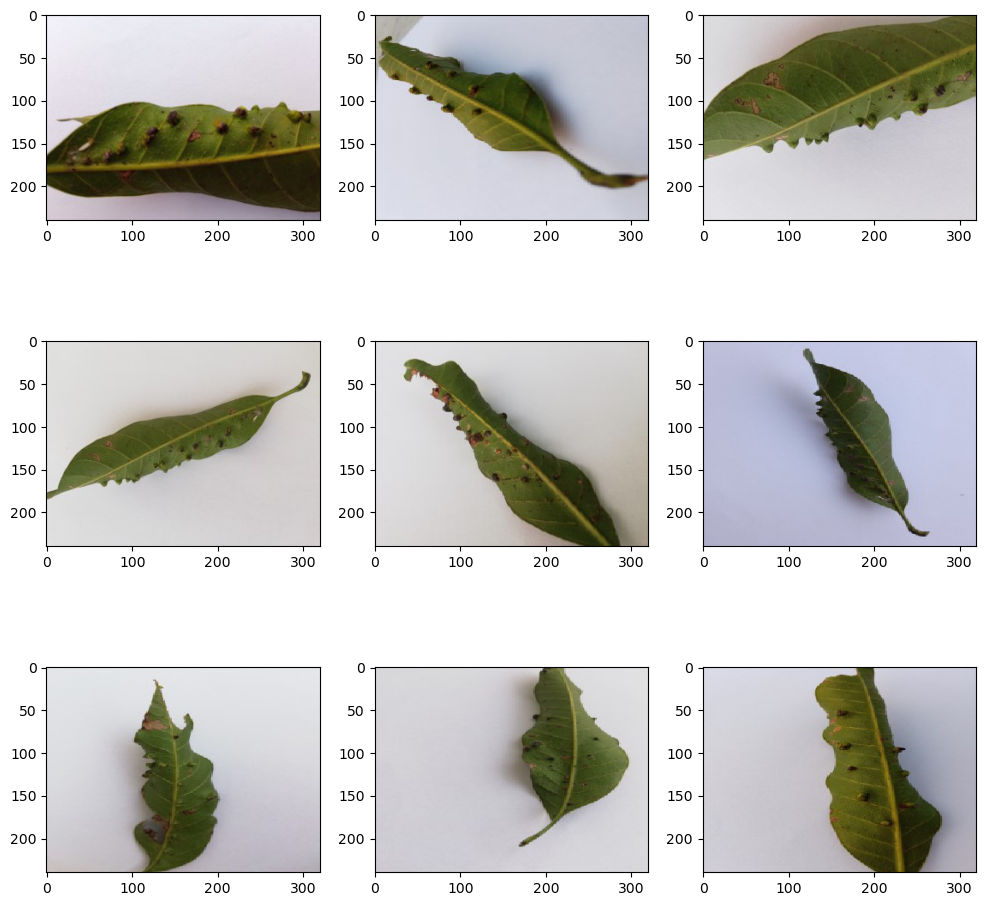

In [19]:
type = 'Gall'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(Gall+"/"+
                  os.listdir(Gall)[i], target_size=(pic_height, pic_len))
    plt.imshow(img)   
plt.show()

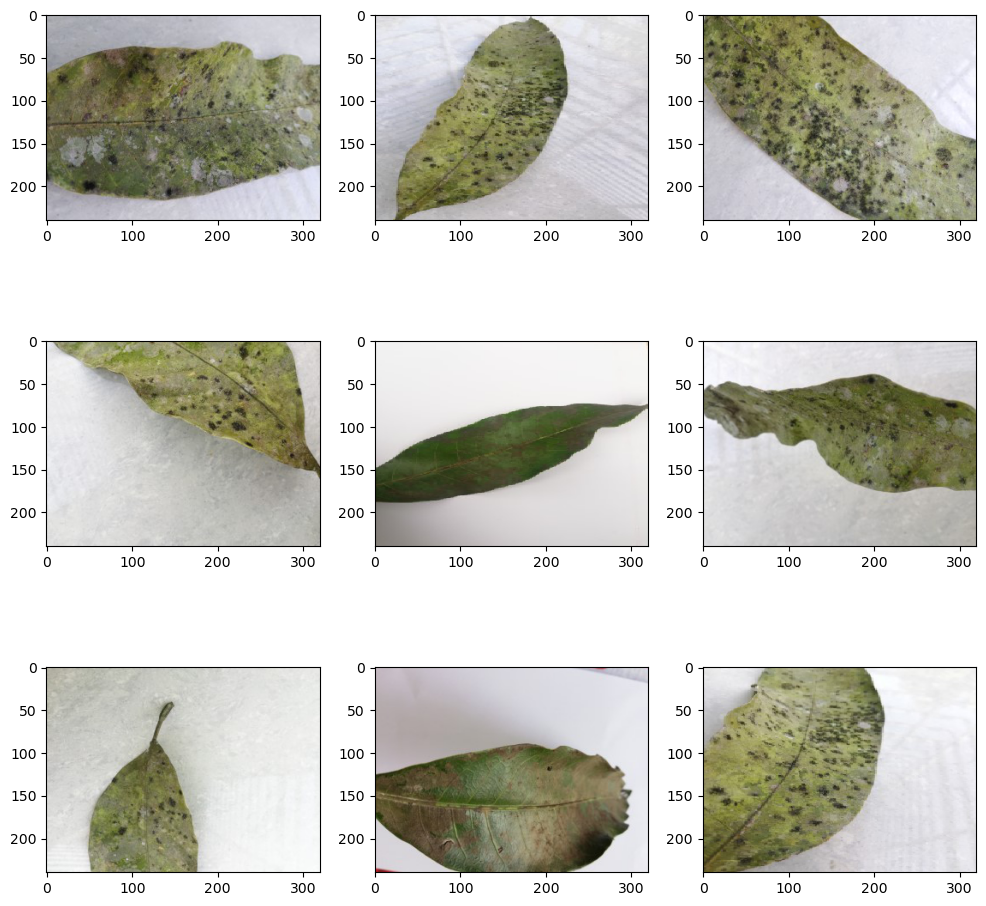

In [20]:
type = 'Sooty Mould'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(Sooty_Mould+"/"+
                  os.listdir(Sooty_Mould)[i], target_size=(pic_height, pic_len))
    plt.imshow(img)   
plt.show()

# Creating Train and Test dataset

In [28]:
# creating list of images 
Anthra = os.listdir(Anthracnose)
Bact = os.listdir(Bacterial)
Cut = os.listdir(Cutting_Weevil)
Die = os.listdir(Die_Back)
Midge = os.listdir(Gall)
Heal = os.listdir(Healthy)
Powder = os.listdir(Powdery_Mildew)
Sooty = os.listdir(Sooty_Mould)

In [29]:
import random
random.shuffle(Anthra)
random.shuffle(Bact)
random.shuffle(Cut)
random.shuffle(Die)
random.shuffle(Midge)
random.shuffle(Heal)
random.shuffle(Powder)
random.shuffle(Sooty)

In [46]:
import os
import random
import shutil

# Define the paths to the different disease categories
Powdery_Mildew = "/kaggle/input/mango-leaf-disease-dataset/Powdery Mildew/"
Anthracnose = "/kaggle/input/mango-leaf-disease-dataset/Anthracnose/"
Healthy = "/kaggle/input/mango-leaf-disease-dataset/Healthy/"
Cutting_Weevil = "/kaggle/input/mango-leaf-disease-dataset/Cutting Weevil/"
Die_Back = "/kaggle/input/mango-leaf-disease-dataset/Die Back/"
Sooty_Mould = "/kaggle/input/mango-leaf-disease-dataset/Sooty Mould/"
Bacterial = "/kaggle/input/mango-leaf-disease-dataset/Bacterial Canker/"
Gall = "/kaggle/input/mango-leaf-disease-dataset/Gall Midge/"

# Define the paths to store the train and test datasets
train_dir = "/kaggle/working/train/"
test_dir = "/kaggle/working/test/"

# Create the train and test directories if they do not exist
if not os.path.exists(train_dir):
    os.makedirs(train_dir)

if not os.path.exists(test_dir):
    os.makedirs(test_dir)

# Define the categories list and the percentage of images to use for training
categories = ["Powdery_Mildew", "Anthracnose", "Healthy", "Cutting_Weevil", "Die_Back", "Sooty_Mould", "Bacterial", "Gall"]
train_percent = 0.5

# Loop through each category and copy the images to the train and test directories
for category in categories:
    # Define the path to the source directory
    src_dir = eval(category)
    
    # Define the paths to the destination train and test directories
    train_dest_dir = os.path.join(train_dir, category)
    test_dest_dir = os.path.join(test_dir, category)
    
    # Create the train and test directories for the category if they do not exist
    if not os.path.exists(train_dest_dir):
        os.makedirs(train_dest_dir)
    
    if not os.path.exists(test_dest_dir):
        os.makedirs(test_dest_dir)
    
    # Get the list of image file names in the source directory
    file_names = os.listdir(src_dir)
    
    # Shuffle the list of file names randomly
    random.shuffle(file_names)
    
    # Calculate the number of images to use for training
    num_train = int(len(file_names) * train_percent)
    
    # Loop through each file and copy it to the train or test directory
    for i, file_name in enumerate(file_names):
        src_path = os.path.join(src_dir, file_name)
        
        if i < num_train:
            dest_path = os.path.join(train_dest_dir, file_name)
        else:
            dest_path = os.path.join(test_dest_dir, file_name)
        
        shutil.copy(src_path, dest_path)


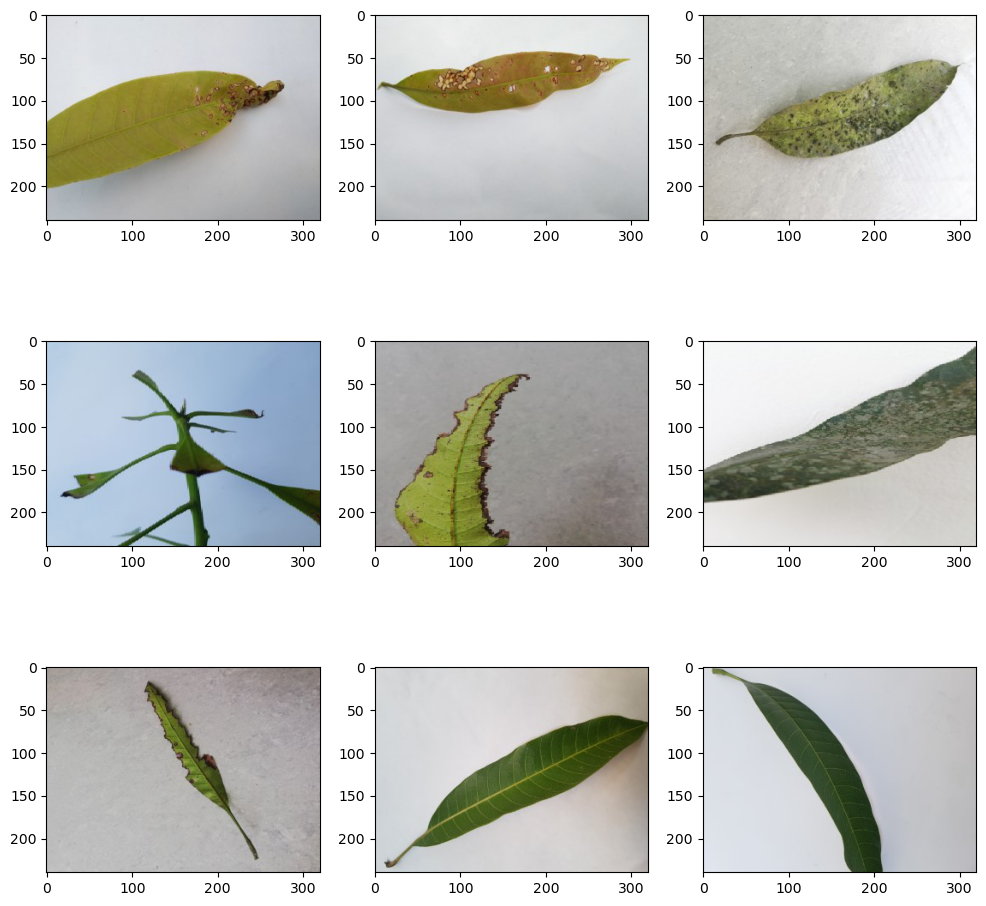

In [41]:
type = 'train_dir'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(train_dir+"/"+
                  os.listdir(train_dir)[i], target_size=(pic_height, pic_len))
    plt.imshow(img)   
plt.show()

In [47]:
batch_size=32
datagen_train=ImageDataGenerator(rescale=1./255)
datagen_val=ImageDataGenerator(rescale=1./255)

train_set= datagen_train.flow_from_directory(train_dir,
                                            target_size=(pic_height,pic_len),
                                            color_mode="grayscale",
                                             batch_size=batch_size,
                                            class_mode="categorical",
                                            shuffle=False)
test_set=datagen_val.flow_from_directory(test_dir,
                                       target_size=(pic_height,pic_len),
                                       color_mode="grayscale",
                                       batch_size=batch_size,
                                       class_mode="categorical",
                                       shuffle=False)

Found 2932 images belonging to 8 classes.
Found 2931 images belonging to 8 classes.


In [48]:
no_of_classes=8

model=Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding="same",input_shape=(240,320,1)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


#2nd CNN layer
model.add(Conv2D(128,(5,5),padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes,activation="softmax"))

opt = Adam(lr = 0.1)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 240, 320, 64)      640       
                                                                 
 batch_normalization (BatchN  (None, 240, 320, 64)     256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 240, 320, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 120, 160, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 120, 160, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 120, 160, 128)     2

In [49]:


from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.1)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 7

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])
     


In [50]:


img, label = train_set.__next__()
     


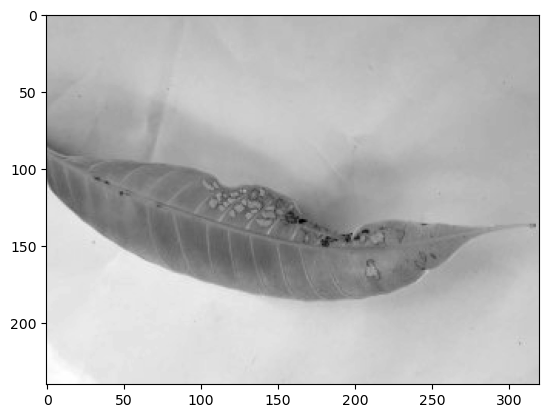

In [51]:
import random
i = random.randint(0, (img.shape[0]-1))
image = img[i]
# labl = class_labels[label[i].argmax()]
plt.imshow(image[:,:,0], cmap='gray')
# plt.title(labl)
plt.show()

In [ ]:
train_path = '/content/contentdrive/MyDrive/Kaggle_face_Emotion/images/train'
test_path = '/content/contentdrive/MyDrive/Kaggle_face_Emotion/images/test'

# num_train_imgs = 0
# for root, dirs, files in os.walk(train_path):
#     num_train_imgs += len(files)
    
# num_test_imgs = 0
# for root, dirs, files in os.walk(test_path):
#     num_test_imgs += len(files)

epochs =7

history = model.fit(train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                    )

model.save('Mango_detection_model_7epochs.h5')

Epoch 1/7
29/91 [========>.....................] - ETA: 24:07 - loss: 2.6626 - accuracy: 0.1250